<a href="https://colab.research.google.com/github/Venkats-AI-codes/AI_practices/blob/main/Evaluate_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.2 Evaluating a model using the 'scoring' parameter

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 4.2.1 classification model evaluation matrix

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)

In [4]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [5]:
print(f"Heart disease Classifier cross-validated accuracy: {np.mean(cross_val_score)*100}")

Heart disease Classifier cross-validated accuracy: 82.48087431693989


#### Area under the receiver operating characteristic curve(AUC/ROC)

1. Area under the curve(AUC)
2. ROC

ROC curves are a comparision of a model's true positive rate (tpr) verses a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [6]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

# create x_test ... etc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [8]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [9]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [10]:
import matplotlib.pyplot as plt

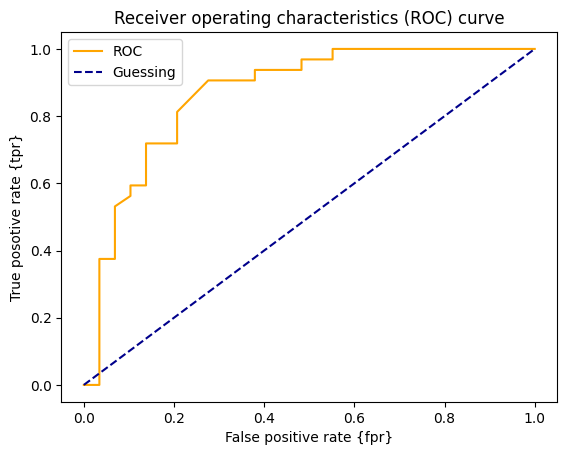

In [11]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
  '''
  Plots a ROC curve given the false positive rate (fpr)
  and true positive reat(tpr) of a model.
  '''
  # plot ROC curve
  plt.plot(fpr, tpr, color="orange", label="ROC")
  # Plot line with no predictive power (base line)
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

  # Customize the plot
  plt.xlabel("False positive rate {fpr}")
  plt.ylabel("True posotive rate {tpr}")
  plt.title("Receiver operating characteristics (ROC) curve")
  plt.legend()
  plt.show()


plot_roc_curve(fpr, tpr)

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8669181034482759)

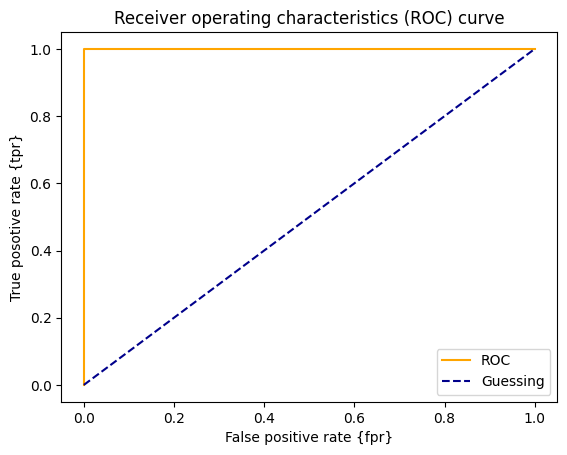

In [13]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [14]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

np.float64(1.0)

#### Confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

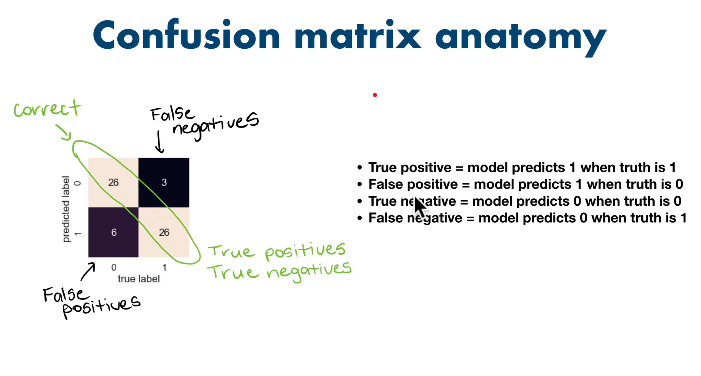

In [15]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [16]:
# Visualize the confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predict Labels"])

Predict Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [17]:
23+6+6+26

61

In [18]:
len(y_preds)

61

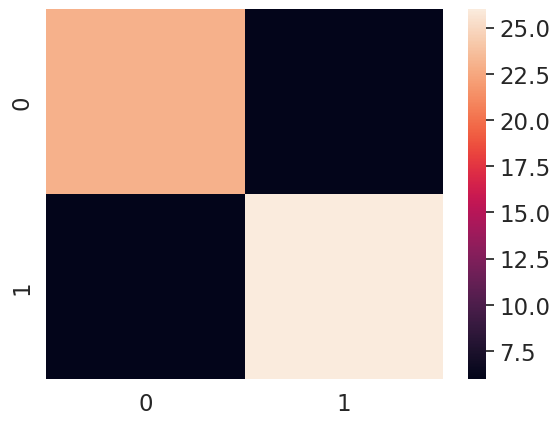

In [19]:
# make our confusion matrix more visual with seaboarn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

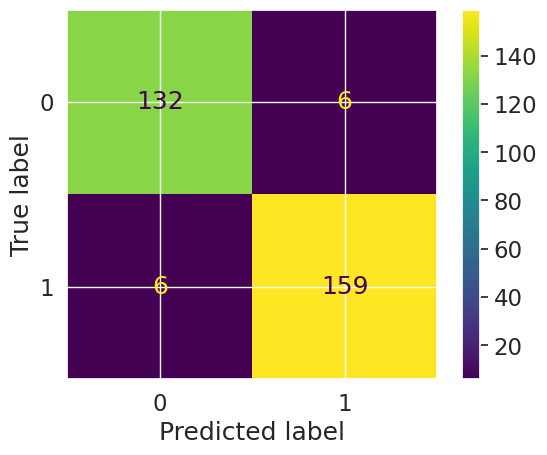

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

#### classification report

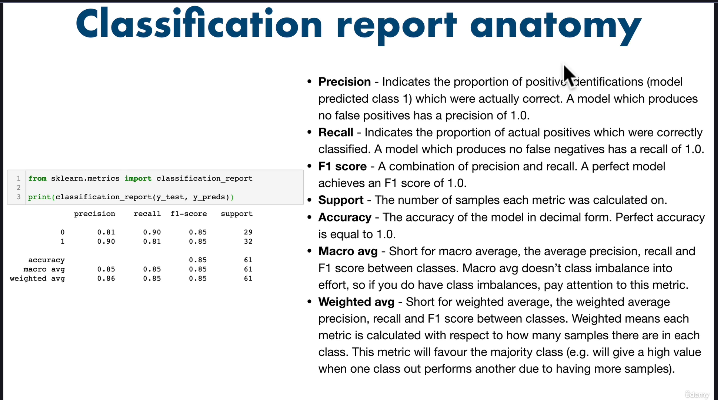

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [24]:
# where precision and recall becomes valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
